In [3]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 56.2/56.2 KB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 7.2 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 KB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 436.0/436.0 KB 6.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install seaborn

     -------------------------------------- 294.6/294.6 KB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

# 데이터 하나로 합치기
- 실제 문장이 들어있는 칼럼만 사용
- 통합된 데이터는 csv로 저장해두기

In [6]:
movie = pd.read_csv("영화리뷰.csv")
purpose = pd.read_csv("용도별목적대화데이터.csv")
topic = pd.read_csv("주제별일상대화데이터.csv")
common_sense = pd.read_csv("일반상식.csv")
add = pd.read_csv("추가데이터.csv")

movie.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)
add.dropna(inplace=True)

In [7]:
print(f"movie shape => {movie.shape}\n\
purpose shape => {purpose.shape}\n\
topic shape => {topic.shape}\n\
common_sense shape => {common_sense.shape}\n\
add => {add.shape}")

movie shape => (199992, 3)
purpose shape => (480494, 1)
topic shape => (1445760, 1)
common_sense shape => (68538, 3)
add => (9216, 2)


In [8]:
all_data = list(movie['document']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
+ list(common_sense['answer']) + list(add['query'])

In [9]:
len(all_data)

2272538

In [12]:
df = pd.DataFrame({'text': all_data})
df.to_csv("./통합데이터.csv", index=False)

# 데이터 라벨링
- 0 -> 장소
- 1 -> 시간
- 2 -> 사람
- 3 -> 내용
- 4 -> 기타

In [6]:
what = []
where = []
when = []
who = []
etc = []

In [15]:
all_data = pd.read_csv('통합데이터.csv', encoding='utf-8')  # 파일 인코딩은 파일의 실제 인코딩에 따라 조정

In [16]:
for i in all_data['text']:
    if ('위치' or '어디' or '장소' or '주소') in i: where.append(i)
    elif ('시작' or '마감' or '언제' or '기간' or '시간' or '며칠' or '몇일' or '몇 일' or '요일' or '몇 시' or '이번 주' or '주말' or '다음 주' or '지난 주') in i: when.append(i)
    elif ('누구' or '누가' or '사람') in i: who.append(i)
    elif ('뭐하' or '뭐 하' or '머하' or '머 하') in i: what.append(i)
    else: etc.append(i)

In [17]:
len(who)

10730

In [18]:
where_label = [0] * len(where)
when_label = [1] * len(when)
who_label = [2] * len(who)
what_label = [3] * len(what)
etc_label = [4] * len(etc)


In [19]:
len(who_label)

10730

In [20]:
train_df = pd.DataFrame({'text': where + when + who + what,
                         'label' : where_label + when_label + who_label + what_label})

train_df.head()

,text,label
0,2014년 한국사회 안에서 예술가라는 포지션이 어디쯤에 위치하고 있는가에 대해서 깊...,0
1,짐캐리를 지금의 위치로 올려준 94년도 3작품중 하나,0
2,"홍콩에서 가장 유능한 감독 유위강, 당시 최고의 배우 정이건, 만화계의 절대적인 위...",0
3,80년대 국산 애니메이션 중 보석같은 작품중의 하나 입니다. 이런 애니메이션이 계속...,0
4,평점주기전에 시즌오브더위치 보고올것..시즌오브더위치보다 평점이 낮다니 말도안되,0


In [21]:
train_df.tail()

,text,label
24249,마누엘 노리에가는 뭐하는 사람이야,3
24250,김소희는 뭐하는 사람이야,3
24251,재밌다는사람들이 많네 ㅋㅋ 어디서 재밌어야되나요 ㅋㅋ 텔레비전틀다가여민정나오길레 궁...,3
24252,내용전개가 너무느리고 진짜 오글거려요.... 한약방.의원집 에피소드는 너무 감칠맛나...,3
24253,신상옥 감독 아들이란 사람이 유학씩이나 가서 돈만 뿌리고 왔구만... 국어책을 읽어...,3


In [23]:
train_df.label.nunique()

4

In [22]:
train_df.to_csv("train_data.csv", index=False)

# 패딩 길이 계산

In [63]:
train_df.shape

(48508, 2)

In [64]:
tokenizer = Komoran()

In [65]:
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in train_df['text']]

exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

data_list = []
for i in range(len(data_tokenized)):
        temp = []
        for j in range(len(data_tokenized[i])):
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [66]:
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 7.911560979632226
토큰 길이 최대: 69
토큰 길이 표준편차: 6.020871926122959


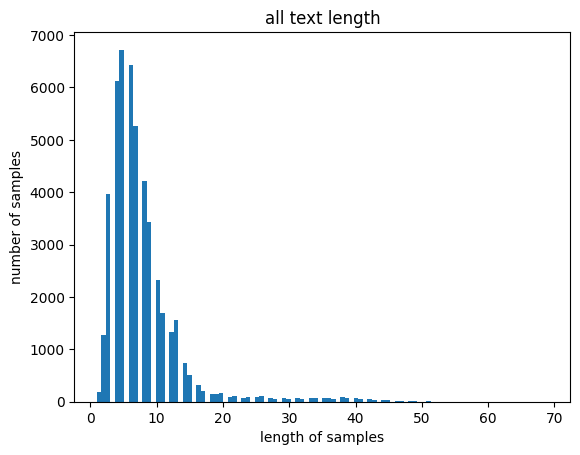

In [67]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [68]:
select_length = 25

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9725406118578379
